# Test on point source

- unCLEANed image

In [1]:
import basc

import astropy
from astropy.table import Table
from astropy.io import fits

# silent Warning, when open image using aplpy
import warnings
from astropy.utils.exceptions import AstropyWarning 
warnings.simplefilter('ignore', category=AstropyWarning)

import matplotlib
import matplotlib.pyplot as plt

import aplpy

basc.readConfig("config.txt")

%matplotlib inline

/scratch/home/rwibowo/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [2]:
# Generate a view objecct to work with
newView = basc.view()

In [3]:
image_file = 'uid___A002_Xbd203b_X1d77.ms.split.cal-CALIBRATE_PHASE-J1150+2417.ms.self3.cont.iter0.finergrid.image.fits'
psf_file   = 'uid___A002_Xbd203b_X1d77.ms.split.cal-CALIBRATE_PHASE-J1150+2417.ms.self3.cont.iter0.finergrid.psf.fits'
flux_file  = 'uid___A002_Xbd203b_X1d77.ms.split.cal-CALIBRATE_PHASE-J1150+2417.ms.self3.cont.iter0.finergrid.flux.fits'

In [4]:
# Load in the fits files
newView.loadMap(image_file)
newView.loadBeam(psf_file)
newView.loadPBCor(flux_file)

In [5]:
# Run the MCMC process
newView.run()
result = newView.getChain()

In [6]:
print("Evidence: {}".format(newView.getEvidence()))
print("RMS residual: {}".format(newView.getRMS()))

result.write("chain.txt", format="ascii", overwrite=True)
print("Models written to chain.txt")

print("Sources detected:")
print(newView.clusters(eps=3)[0])

Evidence: 1462.3909962559542
RMS residual: 0.0003480189504810119
Models written to chain.txt
Sources detected:
        x                  y          ...          F         
------------------ ------------------ ... -------------------
200.40637059137225 200.29482825969657 ... 0.46650805583891786


In [7]:
fits.info(image_file)

Filename: uid___A002_Xbd203b_X1d77.ms.split.cal-CALIBRATE_PHASE-J1150+2417.ms.self3.cont.iter0.finergrid.image.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     998   (800, 800, 1, 1)   float32   


In [8]:
image_data = fits.getdata(image_file)
psf_data = fits.getdata(psf_file)
flux_data = fits.getdata(flux_file)

In [9]:
image_data.shape

(1, 1, 800, 800)

In [10]:
image_data[0][0].shape

(800, 800)

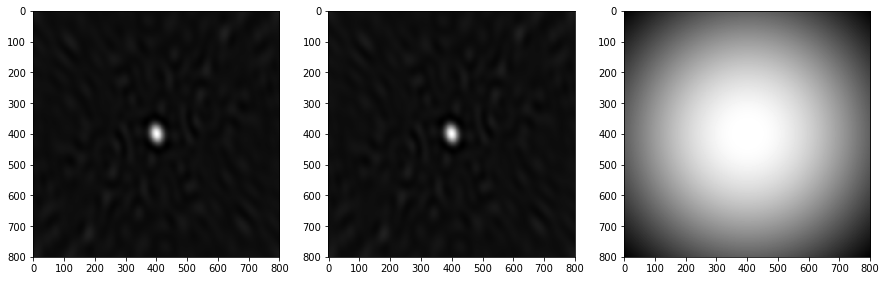

In [11]:
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.imshow(image_data[0][0], cmap='gray')

plt.subplot(132)
plt.imshow(psf_data[0][0], cmap='gray')

plt.subplot(133)
plt.imshow(flux_data[0][0], cmap='gray')

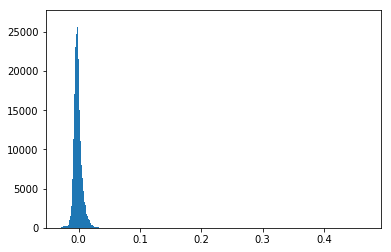

In [12]:
histogram = plt.hist(image_data[0][0].flatten(), 1000)

INFO: Setting slices=[0, 0] [aplpy.core]


INFO: Auto-setting vmin to -4.351e-02 [aplpy.core]
INFO: Auto-setting vmax to  2.102e-01 [aplpy.core]


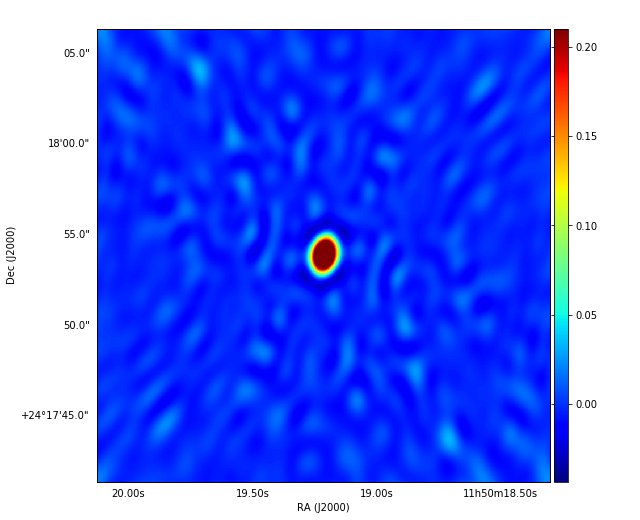

In [13]:
image = aplpy.FITSFigure(image_file)
image.show_colorscale()
image.show_colorbar()
#image.show_contour()

INFO: Setting slices=[0, 0] [aplpy.core]


INFO: Auto-setting vmin to -9.425e-02 [aplpy.core]
INFO: Auto-setting vmax to  4.481e-01 [aplpy.core]


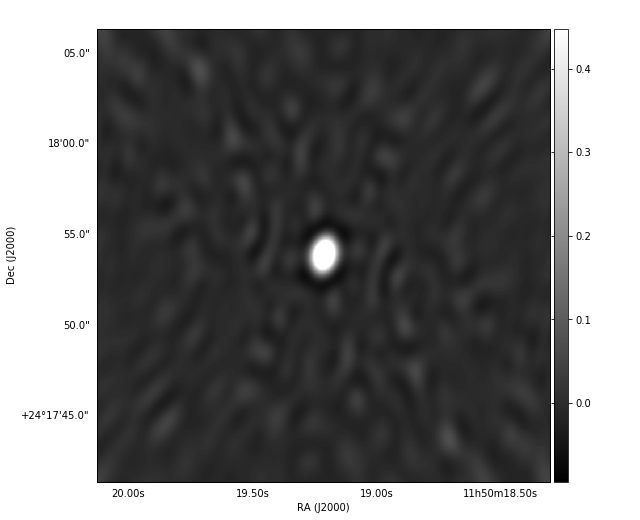

In [14]:
psf = aplpy.FITSFigure(psf_file)
psf.show_grayscale()
psf.show_colorbar()
#psf.show_contour()

In [15]:
newView.clusters()

(<Table length=1>
         x                  y          ...          F         
      float64            float64       ...       float64      
 ------------------ ------------------ ... -------------------
 200.40637059137225 200.29482825969657 ... 0.46650805583891786, 14)

In [16]:
result

x,y,F,k,L
float64,float64,float64,int64,float64
200.28006308712065,200.74116974137723,0.47620353084236083,0,1599.4600524931448
154.38963226042688,287.27279766462743,0.00041328819574841584,1,1595.9668224700815
68.91284841112792,157.054673274979,0.0015733567916802198,1,1595.9668224700815
200.7787121925503,199.50593155808747,0.45788564390791925,1,1595.9668224700815
348.45311562530696,200.00118329189718,0.00038172399701317524,2,1598.8063121456642
200.8987847249955,200.0334142241627,0.4732918607693005,2,1598.8063121456642
57.044354965910316,307.775917602703,0.01199946098990819,2,1598.8063121456642
128.39083983562887,181.96616233326495,0.003539975372117804,2,1598.8063121456642
265.8655705396086,375.6750104483217,0.0005836559307183318,3,1598.9936397101985


In [17]:
newView.getRMS()

0.0003480189504810119

In [18]:
newView.getEvidence()

1462.3909962559542

In [19]:
newView.resid

array([[-1.33627144e-04, -1.37308428e-04, -1.40372104e-04, ...,
        -1.20437359e-04, -1.14229401e-04, -1.06817869e-04],
       [-1.40035623e-04, -1.43822520e-04, -1.46970559e-04, ...,
        -1.21040448e-04, -1.14581891e-04, -1.06979834e-04],
       [-1.45872322e-04, -1.49764680e-04, -1.52999091e-04, ...,
        -1.21142861e-04, -1.14454696e-04, -1.06682138e-04],
       ...,
       [ 6.05190251e-05,  6.46490128e-05,  6.75999932e-05, ...,
        -7.34827916e-06,  5.74722787e-07,  7.80644715e-06],
       [ 6.01040020e-05,  6.42847026e-05,  6.72914414e-05, ...,
        -4.40470514e-06,  3.55724241e-06,  1.07750834e-05],
       [ 5.93670453e-05,  6.35712361e-05,  6.66061429e-05, ...,
        -1.17868870e-06,  6.84157544e-06,  1.40643802e-05]])

In [20]:
newView.resid.shape

(400, 400)